Ce TP a été réalisé en binôme par NDIAYE Maïrame et VED Olesia en M2 IASD en apprentissage. 

# Deep Q Network on CartPole

In [1]:
from tqdm import tqdm 
from math import *
import matplotlib.pyplot as plt

import gym
import numpy as np
import random

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [4]:
# Création de l'environnement
env = gym.make('CartPole-v1')

In [5]:
def runningAvg(data, windowSize):
  res = np.zeros(len(data)-windowSize)
  sum=0
  for i in range(windowSize):
    sum += data[i]
  for i in range(len(data)-windowSize):
    res[i]= sum/windowSize
    sum -= data[i]
    sum += data[i+windowSize]
  return res

In [6]:
# Fonction de choix de l'action
def choix_action(eps,state,model):
    choice = [True, False]
    exploite = random.choices(choice, weights=(100-100*eps, 100*eps))
    if(exploite[0]==False): #On explore
        return env.action_space.sample() #On choisit une action au hasard 
        
    #Sinon on exploite, c'est-à-dire on choisit la meilleure action trouvé avec l'approximation du model
    q_state = model.predict(state)
    return np.argmax(q_state)

In [7]:
def DQN(nbEpisodes, txEsc, alpha, eps):
        # Création du modèle de réseau de neurones avec 3 couches
        model = Sequential()
        model.add(Dense(24, input_dim=4, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(2, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=alpha))

        success_plot=[0]*nbEpisodes

        for episode in tqdm(range(nbEpisodes)):

          # Réinitialisation de l'environnement
          score = 0
          state = env.reset()
          state = np.reshape(state, [1, 4]) #On modifie le format de l'état pour avoir ce qu'on souhaite
          done = False

          # Boucle de l'épisode

          while not done:
            # Choix de l'action
            action = choix_action(eps,state,model)

            # Exécution de l'action dans l'environnement
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state, [1, 4])
            score+=reward

            if done: #Si next_state est terminal
              target = reward
              success_plot[episode] = score
            else:
              target = reward + txEsc * np.amax(model.predict(next_state)[0])
            
            # Apprentissage du modèle
            target_f = model.predict(state)
            target_f[0][action] = target
            model.fit(state, target_f, epochs=1, verbose=0)

            # Mise à jour de l'état courant
            state = next_state

        return(success_plot)

In [8]:
success_plot = DQN(500, 0.9, 0.2, 0.1)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 1/500 [00:04<39:55,  4.80s/it]

1/1 [==============================] - 0s 15ms/step


  0%|          | 2/500 [00:06<23:07,  2.79s/it]

1/1 [==============================] - 0s 15ms/step


  1%|          | 3/500 [00:07<18:27,  2.23s/it]

1/1 [==============================] - 0s 14ms/step


  1%|          | 4/500 [00:10<18:35,  2.25s/it]

1/1 [==============================] - 0s 15ms/step


  1%|          | 5/500 [00:11<17:09,  2.08s/it]

1/1 [==============================] - 0s 13ms/step


  1%|          | 6/500 [00:13<15:01,  1.83s/it]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 7/500 [00:14<14:02,  1.71s/it]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 8/500 [00:16<14:20,  1.75s/it]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 9/500 [00:17<13:36,  1.66s/it]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 10/500 [00:19<13:01,  1.60s/it]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 11/500 [00:20<12:36,  1.55s/it]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 12/500 [00:22<12:36,  1.55s/it]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 13/500 [00:23<12:45,  1.57s/it]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 14/500 [00:25<11:57,  1.48s/it]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 15/500 [00:26<11:56,  1.48s/it]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 16/500 [00:27<11:21,  1.41s/it]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 17/500 [00:29<11:59,  1.49s/it]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 18/500 [00:31<12:49,  1.60s/it]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 19/500 [00:32<12:12,  1.52s/it]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 20/500 [00:35<14:00,  1.75s/it]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 21/500 [00:36<14:06,  1.77s/it]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 22/500 [00:38<14:14,  1.79s/it]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 23/500 [00:40<13:57,  1.76s/it]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 24/500 [00:42<15:38,  1.97s/it]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 25/500 [00:45<16:20,  2.06s/it]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 26/500 [00:46<15:28,  1.96s/it]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 27/500 [00:48<13:51,  1.76s/it]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 28/500 [00:50<14:10,  1.80s/it]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 29/500 [00:51<13:40,  1.74s/it]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 30/500 [00:53<13:44,  1.75s/it]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 31/500 [00:55<13:25,  1.72s/it]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 32/500 [00:56<12:47,  1.64s/it]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 33/500 [00:58<12:56,  1.66s/it]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 34/500 [01:00<14:14,  1.83s/it]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 35/500 [01:02<13:27,  1.74s/it]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 36/500 [01:03<12:52,  1.67s/it]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 37/500 [01:05<13:45,  1.78s/it]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 38/500 [01:07<12:55,  1.68s/it]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 39/500 [01:08<12:50,  1.67s/it]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 40/500 [01:10<13:18,  1.74s/it]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 41/500 [01:12<14:08,  1.85s/it]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 42/500 [01:15<15:23,  2.02s/it]

1/1 [==============================] - 0s 20ms/step


  9%|▊         | 43/500 [01:17<15:07,  1.99s/it]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 44/500 [01:19<15:14,  2.01s/it]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 45/500 [01:20<14:53,  1.96s/it]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 46/500 [01:22<13:59,  1.85s/it]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 47/500 [01:24<13:40,  1.81s/it]

1/1 [==============================] - 0s 16ms/step


 10%|▉         | 48/500 [01:26<13:54,  1.85s/it]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 49/500 [01:28<15:53,  2.12s/it]

1/1 [==============================] - 0s 16ms/step


 10%|█         | 50/500 [01:30<14:26,  1.93s/it]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 51/500 [01:31<13:25,  1.79s/it]

1/1 [==============================] - 0s 16ms/step


 10%|█         | 52/500 [01:33<13:15,  1.78s/it]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 53/500 [01:35<12:52,  1.73s/it]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 54/500 [01:36<12:19,  1.66s/it]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 55/500 [01:38<11:47,  1.59s/it]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 56/500 [01:39<11:22,  1.54s/it]

1/1 [==============================] - 0s 17ms/step


 11%|█▏        | 57/500 [01:41<11:56,  1.62s/it]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 58/500 [01:42<11:42,  1.59s/it]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 59/500 [01:44<11:33,  1.57s/it]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 60/500 [01:46<12:10,  1.66s/it]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 61/500 [01:47<11:24,  1.56s/it]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 62/500 [01:49<11:38,  1.59s/it]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 63/500 [01:50<11:36,  1.59s/it]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 64/500 [01:52<12:18,  1.69s/it]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 65/500 [01:54<12:42,  1.75s/it]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 66/500 [01:56<12:24,  1.72s/it]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 67/500 [01:57<11:54,  1.65s/it]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 68/500 [01:59<12:08,  1.69s/it]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 69/500 [02:01<12:40,  1.76s/it]

1/1 [==============================] - 0s 16ms/step


 14%|█▍        | 70/500 [02:03<12:50,  1.79s/it]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 71/500 [02:04<12:11,  1.70s/it]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 72/500 [02:06<11:21,  1.59s/it]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 73/500 [02:08<11:56,  1.68s/it]

1/1 [==============================] - 0s 16ms/step


 15%|█▍        | 74/500 [02:10<12:42,  1.79s/it]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 75/500 [02:11<12:39,  1.79s/it]

1/1 [==============================] - 0s 15ms/step


 15%|█▌        | 76/500 [02:13<11:33,  1.64s/it]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 77/500 [02:14<11:16,  1.60s/it]

1/1 [==============================] - 0s 16ms/step


 16%|█▌        | 78/500 [02:16<11:05,  1.58s/it]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 79/500 [02:17<11:11,  1.59s/it]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 80/500 [02:19<11:00,  1.57s/it]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 81/500 [02:21<11:14,  1.61s/it]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 82/500 [02:22<11:38,  1.67s/it]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 83/500 [02:24<11:59,  1.73s/it]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 84/500 [02:26<12:03,  1.74s/it]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 85/500 [02:28<11:35,  1.68s/it]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 86/500 [02:29<11:43,  1.70s/it]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 87/500 [02:31<11:18,  1.64s/it]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 88/500 [02:33<11:26,  1.67s/it]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 89/500 [02:35<13:15,  1.94s/it]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 90/500 [02:37<12:44,  1.86s/it]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 91/500 [02:38<12:13,  1.79s/it]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 92/500 [02:40<11:40,  1.72s/it]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 93/500 [02:42<11:44,  1.73s/it]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 94/500 [02:43<11:29,  1.70s/it]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 95/500 [02:45<11:26,  1.69s/it]

1/1 [==============================] - 0s 16ms/step


 19%|█▉        | 96/500 [02:47<12:05,  1.80s/it]

1/1 [==============================] - 0s 13ms/step


 19%|█▉        | 97/500 [02:49<12:54,  1.92s/it]

1/1 [==============================] - 0s 16ms/step


 20%|█▉        | 98/500 [02:51<12:55,  1.93s/it]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 99/500 [02:53<13:18,  1.99s/it]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 100/500 [02:55<13:08,  1.97s/it]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 101/500 [02:57<12:18,  1.85s/it]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 102/500 [02:59<12:20,  1.86s/it]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 103/500 [03:00<11:52,  1.79s/it]

1/1 [==============================] - 0s 13ms/step


 21%|██        | 104/500 [03:02<12:22,  1.87s/it]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 105/500 [03:04<12:35,  1.91s/it]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 106/500 [03:06<12:32,  1.91s/it]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 107/500 [03:10<15:05,  2.30s/it]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 108/500 [03:13<16:19,  2.50s/it]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 109/500 [03:15<17:01,  2.61s/it]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 110/500 [03:19<19:01,  2.93s/it]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 111/500 [03:23<21:24,  3.30s/it]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 112/500 [03:29<26:43,  4.13s/it]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 113/500 [03:33<24:45,  3.84s/it]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 114/500 [03:44<40:12,  6.25s/it]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 115/500 [03:46<31:40,  4.94s/it]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 116/500 [03:48<25:06,  3.92s/it]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 117/500 [03:50<21:20,  3.34s/it]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 118/500 [03:52<18:22,  2.89s/it]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 119/500 [03:53<15:56,  2.51s/it]

1/1 [==============================] - 0s 13ms/step


 24%|██▍       | 120/500 [03:55<14:39,  2.31s/it]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 121/500 [03:56<12:43,  2.02s/it]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 122/500 [03:59<13:58,  2.22s/it]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 123/500 [04:01<13:28,  2.15s/it]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 124/500 [04:03<12:51,  2.05s/it]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 125/500 [04:05<12:26,  1.99s/it]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 126/500 [04:07<12:42,  2.04s/it]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 127/500 [04:09<12:30,  2.01s/it]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 128/500 [04:11<13:22,  2.16s/it]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 129/500 [04:13<12:39,  2.05s/it]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 130/500 [04:15<11:36,  1.88s/it]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 131/500 [04:17<12:15,  1.99s/it]

1/1 [==============================] - 0s 13ms/step


 26%|██▋       | 132/500 [04:20<14:16,  2.33s/it]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 133/500 [04:22<13:16,  2.17s/it]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 134/500 [04:24<13:14,  2.17s/it]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 135/500 [04:26<12:28,  2.05s/it]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 136/500 [04:27<11:46,  1.94s/it]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 137/500 [04:29<11:04,  1.83s/it]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 138/500 [04:31<11:04,  1.83s/it]

1/1 [==============================] - 0s 13ms/step


 28%|██▊       | 139/500 [04:32<10:33,  1.75s/it]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 140/500 [04:34<10:22,  1.73s/it]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 141/500 [04:36<10:06,  1.69s/it]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 142/500 [04:38<10:45,  1.80s/it]

1/1 [==============================] - 0s 16ms/step


 29%|██▊       | 143/500 [04:41<12:32,  2.11s/it]

1/1 [==============================] - 0s 13ms/step


 29%|██▉       | 144/500 [04:43<12:25,  2.09s/it]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 145/500 [04:45<13:25,  2.27s/it]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 146/500 [04:53<22:45,  3.86s/it]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 147/500 [04:57<22:21,  3.80s/it]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 148/500 [04:59<19:10,  3.27s/it]

1/1 [==============================] - 0s 13ms/step


 30%|██▉       | 149/500 [05:01<17:18,  2.96s/it]

1/1 [==============================] - 0s 16ms/step


 30%|███       | 150/500 [05:02<14:45,  2.53s/it]

1/1 [==============================] - 0s 13ms/step


 30%|███       | 151/500 [05:04<13:04,  2.25s/it]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 152/500 [05:06<12:29,  2.15s/it]

1/1 [==============================] - 0s 13ms/step


 31%|███       | 153/500 [05:08<12:37,  2.18s/it]

1/1 [==============================] - 0s 13ms/step


 31%|███       | 154/500 [05:10<12:13,  2.12s/it]

1/1 [==============================] - 0s 13ms/step


 31%|███       | 155/500 [05:12<12:04,  2.10s/it]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 156/500 [05:14<11:51,  2.07s/it]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 157/500 [05:16<11:15,  1.97s/it]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 158/500 [05:18<11:47,  2.07s/it]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 159/500 [05:21<12:16,  2.16s/it]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 160/500 [05:23<12:14,  2.16s/it]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 161/500 [05:25<12:00,  2.13s/it]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 162/500 [05:27<11:32,  2.05s/it]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 163/500 [05:29<12:14,  2.18s/it]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 164/500 [05:31<12:08,  2.17s/it]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 165/500 [05:33<12:02,  2.16s/it]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 166/500 [05:35<11:04,  1.99s/it]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 167/500 [05:37<10:53,  1.96s/it]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 168/500 [05:39<10:30,  1.90s/it]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 169/500 [05:41<11:25,  2.07s/it]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 170/500 [05:44<12:42,  2.31s/it]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 171/500 [05:46<12:32,  2.29s/it]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 172/500 [05:48<11:57,  2.19s/it]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 173/500 [05:50<11:40,  2.14s/it]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 174/500 [05:52<10:32,  1.94s/it]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 175/500 [05:54<10:32,  1.95s/it]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 176/500 [05:55<09:56,  1.84s/it]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 177/500 [05:57<09:29,  1.76s/it]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 178/500 [05:59<09:29,  1.77s/it]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 179/500 [06:01<09:57,  1.86s/it]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 180/500 [06:02<09:50,  1.85s/it]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 181/500 [06:04<09:55,  1.87s/it]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 182/500 [06:08<11:54,  2.25s/it]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 183/500 [06:09<10:53,  2.06s/it]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 184/500 [06:11<10:02,  1.91s/it]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 185/500 [06:13<10:07,  1.93s/it]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 186/500 [06:16<11:58,  2.29s/it]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 187/500 [06:18<11:55,  2.29s/it]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 188/500 [06:20<11:54,  2.29s/it]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 189/500 [06:23<12:13,  2.36s/it]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 190/500 [06:26<13:40,  2.65s/it]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 191/500 [06:30<15:35,  3.03s/it]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 192/500 [06:35<17:48,  3.47s/it]

1/1 [==============================] - 0s 14ms/step


 39%|███▊      | 193/500 [06:40<21:07,  4.13s/it]

1/1 [==============================] - 0s 15ms/step


 39%|███▉      | 194/500 [06:53<34:02,  6.68s/it]

1/1 [==============================] - 0s 19ms/step


 39%|███▉      | 195/500 [07:00<34:06,  6.71s/it]

1/1 [==============================] - 0s 14ms/step


 39%|███▉      | 196/500 [07:03<28:59,  5.72s/it]

1/1 [==============================] - 0s 16ms/step


 39%|███▉      | 197/500 [07:05<23:45,  4.70s/it]

1/1 [==============================] - 0s 16ms/step


 40%|███▉      | 198/500 [07:08<20:40,  4.11s/it]

1/1 [==============================] - 0s 14ms/step


 40%|███▉      | 199/500 [07:11<18:58,  3.78s/it]

1/1 [==============================] - 0s 14ms/step


 40%|████      | 200/500 [07:13<16:24,  3.28s/it]

1/1 [==============================] - 0s 14ms/step


 40%|████      | 201/500 [07:18<18:51,  3.79s/it]

1/1 [==============================] - 0s 13ms/step


 40%|████      | 202/500 [07:27<26:38,  5.36s/it]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 203/500 [07:31<23:42,  4.79s/it]

1/1 [==============================] - 0s 13ms/step


 41%|████      | 204/500 [07:34<20:58,  4.25s/it]

1/1 [==============================] - 0s 14ms/step


 41%|████      | 205/500 [07:37<19:58,  4.06s/it]

1/1 [==============================] - 0s 15ms/step


 41%|████      | 206/500 [07:45<24:41,  5.04s/it]

1/1 [==============================] - 0s 15ms/step


 41%|████▏     | 207/500 [07:50<25:00,  5.12s/it]

1/1 [==============================] - 0s 13ms/step


 42%|████▏     | 208/500 [07:55<25:20,  5.21s/it]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 209/500 [08:04<30:39,  6.32s/it]

1/1 [==============================] - 0s 14ms/step


 42%|████▏     | 210/500 [08:09<27:57,  5.78s/it]

1/1 [==============================] - 0s 16ms/step


 42%|████▏     | 211/500 [08:17<31:36,  6.56s/it]

1/1 [==============================] - 0s 13ms/step


 42%|████▏     | 212/500 [08:22<29:31,  6.15s/it]

1/1 [==============================] - 0s 16ms/step


 43%|████▎     | 213/500 [08:26<25:06,  5.25s/it]

1/1 [==============================] - 0s 13ms/step


 43%|████▎     | 214/500 [08:28<20:48,  4.37s/it]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 215/500 [08:30<17:23,  3.66s/it]

1/1 [==============================] - 0s 13ms/step


 43%|████▎     | 216/500 [08:33<16:13,  3.43s/it]

1/1 [==============================] - 0s 13ms/step


 43%|████▎     | 217/500 [08:36<15:39,  3.32s/it]

1/1 [==============================] - 0s 15ms/step


 44%|████▎     | 218/500 [08:41<18:37,  3.96s/it]

1/1 [==============================] - 0s 15ms/step


 44%|████▍     | 219/500 [08:49<23:15,  4.97s/it]

1/1 [==============================] - 0s 16ms/step


 44%|████▍     | 220/500 [08:58<28:59,  6.21s/it]

1/1 [==============================] - 0s 14ms/step


 44%|████▍     | 221/500 [09:04<28:40,  6.17s/it]

1/1 [==============================] - 0s 15ms/step


 44%|████▍     | 222/500 [09:07<24:53,  5.37s/it]

1/1 [==============================] - 0s 15ms/step


 45%|████▍     | 223/500 [09:10<21:25,  4.64s/it]

1/1 [==============================] - 0s 14ms/step


 45%|████▍     | 224/500 [09:14<19:45,  4.29s/it]

1/1 [==============================] - 0s 15ms/step


 45%|████▌     | 225/500 [09:16<17:07,  3.74s/it]

1/1 [==============================] - 0s 13ms/step


 45%|████▌     | 226/500 [09:19<15:49,  3.47s/it]

1/1 [==============================] - 0s 19ms/step


 45%|████▌     | 227/500 [09:21<13:31,  2.97s/it]

1/1 [==============================] - 0s 14ms/step


 46%|████▌     | 228/500 [09:24<13:04,  2.89s/it]

1/1 [==============================] - 0s 14ms/step


 46%|████▌     | 229/500 [09:25<11:38,  2.58s/it]

1/1 [==============================] - 0s 15ms/step


 46%|████▌     | 230/500 [09:28<11:48,  2.63s/it]

1/1 [==============================] - 0s 14ms/step


 46%|████▌     | 231/500 [09:31<12:15,  2.73s/it]

1/1 [==============================] - 0s 16ms/step


 46%|████▋     | 232/500 [09:35<13:51,  3.10s/it]

1/1 [==============================] - 0s 13ms/step


 47%|████▋     | 233/500 [09:45<22:44,  5.11s/it]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 234/500 [09:54<27:45,  6.26s/it]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 235/500 [10:11<41:39,  9.43s/it]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 236/500 [10:23<45:57, 10.45s/it]

1/1 [==============================] - 0s 14ms/step


 47%|████▋     | 237/500 [10:30<41:08,  9.39s/it]

1/1 [==============================] - 0s 14ms/step


 48%|████▊     | 238/500 [10:36<35:24,  8.11s/it]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 239/500 [10:41<31:20,  7.21s/it]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 240/500 [10:48<31:26,  7.26s/it]

1/1 [==============================] - 0s 15ms/step


 48%|████▊     | 241/500 [11:00<37:24,  8.66s/it]

1/1 [==============================] - 0s 15ms/step


 48%|████▊     | 242/500 [11:10<38:37,  8.98s/it]

1/1 [==============================] - 0s 15ms/step


 49%|████▊     | 243/500 [11:16<35:24,  8.27s/it]

1/1 [==============================] - 0s 14ms/step


 49%|████▉     | 244/500 [11:26<36:46,  8.62s/it]

1/1 [==============================] - 0s 16ms/step


 49%|████▉     | 245/500 [11:33<34:52,  8.21s/it]

1/1 [==============================] - 0s 15ms/step


 49%|████▉     | 246/500 [11:40<33:11,  7.84s/it]

1/1 [==============================] - 0s 14ms/step


 49%|████▉     | 247/500 [11:47<32:31,  7.71s/it]

1/1 [==============================] - 0s 14ms/step


 50%|████▉     | 248/500 [11:51<27:31,  6.56s/it]

1/1 [==============================] - 0s 15ms/step


 50%|████▉     | 249/500 [12:02<32:42,  7.82s/it]

1/1 [==============================] - 0s 15ms/step


 50%|█████     | 250/500 [12:14<38:12,  9.17s/it]

1/1 [==============================] - 0s 15ms/step


 50%|█████     | 251/500 [12:30<46:22, 11.17s/it]

1/1 [==============================] - 0s 13ms/step


 50%|█████     | 252/500 [12:40<44:21, 10.73s/it]

1/1 [==============================] - 0s 14ms/step


 51%|█████     | 253/500 [12:49<41:43, 10.14s/it]

1/1 [==============================] - 0s 17ms/step


 51%|█████     | 254/500 [12:54<35:31,  8.66s/it]

1/1 [==============================] - 0s 14ms/step


 51%|█████     | 255/500 [12:58<30:25,  7.45s/it]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 256/500 [13:03<26:39,  6.56s/it]

1/1 [==============================] - 0s 15ms/step


 51%|█████▏    | 257/500 [13:15<32:46,  8.09s/it]

1/1 [==============================] - 0s 13ms/step


 52%|█████▏    | 258/500 [13:29<39:49,  9.88s/it]

1/1 [==============================] - 0s 16ms/step


 52%|█████▏    | 259/500 [13:33<33:29,  8.34s/it]

1/1 [==============================] - 0s 14ms/step


 52%|█████▏    | 260/500 [13:38<28:44,  7.18s/it]

1/1 [==============================] - 0s 15ms/step


 52%|█████▏    | 261/500 [13:43<25:50,  6.49s/it]

1/1 [==============================] - 0s 15ms/step


 52%|█████▏    | 262/500 [13:49<25:11,  6.35s/it]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 263/500 [14:08<40:34, 10.27s/it]

1/1 [==============================] - 0s 16ms/step


 53%|█████▎    | 264/500 [14:14<35:24,  9.00s/it]

1/1 [==============================] - 0s 15ms/step


 53%|█████▎    | 265/500 [14:26<38:44,  9.89s/it]

1/1 [==============================] - 0s 15ms/step


 53%|█████▎    | 266/500 [14:43<46:12, 11.85s/it]

1/1 [==============================] - 0s 13ms/step


 53%|█████▎    | 267/500 [14:46<36:39,  9.44s/it]

1/1 [==============================] - 0s 16ms/step


 54%|█████▎    | 268/500 [14:51<31:23,  8.12s/it]

1/1 [==============================] - 0s 15ms/step


 54%|█████▍    | 269/500 [14:55<26:24,  6.86s/it]

1/1 [==============================] - 0s 13ms/step


 54%|█████▍    | 270/500 [15:23<50:04, 13.06s/it]

1/1 [==============================] - 0s 16ms/step


 54%|█████▍    | 271/500 [15:31<43:38, 11.44s/it]

1/1 [==============================] - 0s 14ms/step


 54%|█████▍    | 272/500 [15:49<51:32, 13.56s/it]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 273/500 [15:53<40:47, 10.78s/it]

1/1 [==============================] - 0s 15ms/step


 55%|█████▍    | 274/500 [15:58<34:04,  9.05s/it]

1/1 [==============================] - 0s 15ms/step


 55%|█████▌    | 275/500 [16:02<27:51,  7.43s/it]

1/1 [==============================] - 0s 16ms/step


 55%|█████▌    | 276/500 [16:10<28:19,  7.59s/it]

1/1 [==============================] - 0s 20ms/step


 55%|█████▌    | 277/500 [16:21<31:45,  8.54s/it]

1/1 [==============================] - 0s 14ms/step


 56%|█████▌    | 278/500 [16:32<34:46,  9.40s/it]

1/1 [==============================] - 0s 15ms/step


 56%|█████▌    | 279/500 [16:41<34:21,  9.33s/it]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 280/500 [16:51<34:53,  9.52s/it]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 281/500 [16:56<29:21,  8.04s/it]

1/1 [==============================] - 0s 16ms/step


 56%|█████▋    | 282/500 [17:11<36:39, 10.09s/it]

1/1 [==============================] - 0s 14ms/step


 57%|█████▋    | 283/500 [17:21<36:18, 10.04s/it]

1/1 [==============================] - 0s 16ms/step


 57%|█████▋    | 284/500 [17:25<30:14,  8.40s/it]

1/1 [==============================] - 0s 14ms/step


 57%|█████▋    | 285/500 [17:30<26:29,  7.39s/it]

1/1 [==============================] - 0s 15ms/step


 57%|█████▋    | 286/500 [17:45<34:27,  9.66s/it]

1/1 [==============================] - 0s 15ms/step


 57%|█████▋    | 287/500 [17:49<28:05,  7.92s/it]

1/1 [==============================] - 0s 16ms/step


 58%|█████▊    | 288/500 [18:01<31:59,  9.05s/it]

1/1 [==============================] - 0s 14ms/step


 58%|█████▊    | 289/500 [18:11<33:04,  9.40s/it]

1/1 [==============================] - 0s 14ms/step


 58%|█████▊    | 290/500 [18:23<35:47, 10.23s/it]

1/1 [==============================] - 0s 15ms/step


 58%|█████▊    | 291/500 [18:37<39:10, 11.25s/it]

1/1 [==============================] - 0s 14ms/step


 58%|█████▊    | 292/500 [18:59<50:35, 14.59s/it]

1/1 [==============================] - 0s 16ms/step


 59%|█████▊    | 293/500 [19:08<44:25, 12.88s/it]

1/1 [==============================] - 0s 14ms/step


 59%|█████▉    | 294/500 [19:18<41:09, 11.99s/it]

1/1 [==============================] - 0s 13ms/step


 59%|█████▉    | 295/500 [19:28<39:07, 11.45s/it]

1/1 [==============================] - 0s 16ms/step


 59%|█████▉    | 296/500 [19:42<41:40, 12.26s/it]

1/1 [==============================] - 0s 14ms/step


 59%|█████▉    | 297/500 [19:50<36:54, 10.91s/it]

1/1 [==============================] - 0s 13ms/step


 60%|█████▉    | 298/500 [20:02<37:18, 11.08s/it]

1/1 [==============================] - 0s 16ms/step


 60%|█████▉    | 299/500 [20:15<39:54, 11.91s/it]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 300/500 [20:21<33:28, 10.04s/it]

1/1 [==============================] - 0s 15ms/step


 60%|██████    | 301/500 [20:33<34:44, 10.48s/it]

1/1 [==============================] - 0s 16ms/step


 60%|██████    | 302/500 [20:52<43:09, 13.08s/it]

1/1 [==============================] - 0s 15ms/step


 61%|██████    | 303/500 [20:57<35:12, 10.72s/it]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 304/500 [21:07<34:00, 10.41s/it]

1/1 [==============================] - 0s 14ms/step


 61%|██████    | 305/500 [21:19<35:33, 10.94s/it]

1/1 [==============================] - 0s 16ms/step


 61%|██████    | 306/500 [21:40<45:36, 14.10s/it]

1/1 [==============================] - 0s 14ms/step


 61%|██████▏   | 307/500 [21:57<47:35, 14.80s/it]

1/1 [==============================] - 0s 13ms/step


 62%|██████▏   | 308/500 [22:27<1:02:16, 19.46s/it]

1/1 [==============================] - 0s 14ms/step


 62%|██████▏   | 309/500 [22:35<50:55, 16.00s/it]  

1/1 [==============================] - 0s 13ms/step


 62%|██████▏   | 310/500 [22:52<51:24, 16.23s/it]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 311/500 [22:59<42:40, 13.55s/it]

1/1 [==============================] - 0s 14ms/step


 62%|██████▏   | 312/500 [23:16<45:19, 14.46s/it]

1/1 [==============================] - 0s 14ms/step


 63%|██████▎   | 313/500 [23:33<47:55, 15.38s/it]

1/1 [==============================] - 0s 14ms/step


 63%|██████▎   | 314/500 [23:44<43:11, 13.93s/it]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 315/500 [23:52<37:37, 12.20s/it]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 316/500 [24:10<43:19, 14.13s/it]

1/1 [==============================] - 0s 13ms/step


 63%|██████▎   | 317/500 [24:39<56:32, 18.54s/it]

1/1 [==============================] - 0s 19ms/step


 64%|██████▎   | 318/500 [24:53<52:04, 17.17s/it]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 319/500 [25:21<1:01:38, 20.43s/it]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 320/500 [25:28<48:52, 16.29s/it]  

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 321/500 [25:40<45:00, 15.09s/it]

1/1 [==============================] - 0s 14ms/step


 64%|██████▍   | 322/500 [26:17<1:03:43, 21.48s/it]

1/1 [==============================] - 0s 17ms/step


 65%|██████▍   | 323/500 [26:31<56:45, 19.24s/it]  

1/1 [==============================] - 0s 19ms/step


 65%|██████▍   | 324/500 [26:47<53:42, 18.31s/it]

1/1 [==============================] - 0s 18ms/step


 65%|██████▌   | 325/500 [27:07<55:30, 19.03s/it]

1/1 [==============================] - 0s 18ms/step


 65%|██████▌   | 326/500 [27:28<56:37, 19.53s/it]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 327/500 [27:47<55:38, 19.30s/it]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 328/500 [28:01<50:50, 17.73s/it]

1/1 [==============================] - 0s 15ms/step


 66%|██████▌   | 329/500 [28:16<47:53, 16.81s/it]

1/1 [==============================] - 0s 15ms/step


 66%|██████▌   | 330/500 [28:43<56:19, 19.88s/it]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 331/500 [29:03<56:37, 20.10s/it]

1/1 [==============================] - 0s 28ms/step


 66%|██████▋   | 332/500 [29:09<43:44, 15.62s/it]

1/1 [==============================] - 0s 16ms/step


 67%|██████▋   | 333/500 [29:16<36:36, 13.15s/it]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 334/500 [29:59<1:01:10, 22.11s/it]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 335/500 [30:01<44:29, 16.18s/it]  

1/1 [==============================] - 0s 13ms/step


 67%|██████▋   | 336/500 [30:04<32:51, 12.02s/it]

1/1 [==============================] - 0s 14ms/step


 67%|██████▋   | 337/500 [30:07<25:52,  9.52s/it]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 338/500 [30:12<21:46,  8.07s/it]

1/1 [==============================] - 0s 13ms/step


 68%|██████▊   | 339/500 [30:32<31:20, 11.68s/it]

1/1 [==============================] - 0s 14ms/step


 68%|██████▊   | 340/500 [30:48<34:12, 12.83s/it]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 341/500 [31:22<51:12, 19.32s/it]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 342/500 [31:45<53:46, 20.42s/it]

1/1 [==============================] - 0s 19ms/step


 69%|██████▊   | 343/500 [32:36<1:17:40, 29.68s/it]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 344/500 [32:39<56:05, 21.58s/it]  

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 345/500 [33:23<1:13:13, 28.35s/it]

1/1 [==============================] - 0s 13ms/step


 69%|██████▉   | 346/500 [34:12<1:28:19, 34.41s/it]

1/1 [==============================] - 0s 15ms/step


 69%|██████▉   | 347/500 [34:37<1:20:49, 31.69s/it]

1/1 [==============================] - 0s 20ms/step


 70%|██████▉   | 348/500 [35:19<1:27:48, 34.66s/it]

1/1 [==============================] - 0s 13ms/step


 70%|██████▉   | 349/500 [35:46<1:21:36, 32.43s/it]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 350/500 [36:56<1:49:36, 43.84s/it]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 351/500 [37:40<1:48:53, 43.85s/it]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 352/500 [39:30<2:37:15, 63.76s/it]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 353/500 [40:33<2:35:13, 63.36s/it]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 354/500 [41:24<2:25:27, 59.78s/it]

1/1 [==============================] - 0s 13ms/step


 71%|███████   | 355/500 [42:06<2:11:45, 54.52s/it]

1/1 [==============================] - 0s 13ms/step


 71%|███████   | 356/500 [42:09<1:33:22, 38.91s/it]

1/1 [==============================] - 0s 20ms/step


 71%|███████▏  | 357/500 [42:57<1:39:30, 41.75s/it]

1/1 [==============================] - 0s 13ms/step


 72%|███████▏  | 358/500 [43:31<1:33:21, 39.45s/it]

1/1 [==============================] - 0s 16ms/step


 72%|███████▏  | 359/500 [44:13<1:34:07, 40.05s/it]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 360/500 [45:05<1:41:49, 43.64s/it]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 361/500 [45:56<1:46:13, 45.85s/it]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 362/500 [47:14<2:07:25, 55.41s/it]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 363/500 [48:02<2:02:01, 53.44s/it]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 364/500 [48:44<1:53:02, 49.87s/it]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 365/500 [49:22<1:44:00, 46.22s/it]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 366/500 [49:59<1:37:30, 43.66s/it]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 367/500 [50:02<1:09:39, 31.42s/it]

1/1 [==============================] - 0s 29ms/step


 74%|███████▎  | 368/500 [50:55<1:23:12, 37.83s/it]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 369/500 [51:41<1:27:44, 40.19s/it]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 370/500 [51:47<1:05:14, 30.11s/it]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 371/500 [52:22<1:07:29, 31.39s/it]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 372/500 [53:06<1:15:07, 35.21s/it]

1/1 [==============================] - 0s 20ms/step


 75%|███████▍  | 373/500 [54:37<1:50:10, 52.05s/it]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 374/500 [55:16<1:40:59, 48.09s/it]

1/1 [==============================] - 0s 18ms/step


 75%|███████▌  | 375/500 [57:14<2:23:58, 69.11s/it]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 376/500 [58:03<2:10:04, 62.94s/it]

1/1 [==============================] - 0s 18ms/step


 75%|███████▌  | 377/500 [59:07<2:09:54, 63.37s/it]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 378/500 [59:10<1:32:08, 45.32s/it]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 379/500 [59:14<1:05:59, 32.72s/it]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 380/500 [59:17<47:48, 23.90s/it]  

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 381/500 [1:00:01<59:28, 29.99s/it]

1/1 [==============================] - 0s 19ms/step


 76%|███████▋  | 382/500 [1:00:05<43:22, 22.05s/it]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 383/500 [1:00:08<32:12, 16.52s/it]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 384/500 [1:00:11<23:53, 12.36s/it]

1/1 [==============================] - 0s 13ms/step


 77%|███████▋  | 385/500 [1:00:15<18:39,  9.74s/it]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 386/500 [1:00:18<15:03,  7.93s/it]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 387/500 [1:01:38<55:35, 29.51s/it]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 388/500 [1:01:42<40:56, 21.94s/it]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 389/500 [1:02:23<50:43, 27.42s/it]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 390/500 [1:02:55<52:54, 28.86s/it]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 391/500 [1:03:22<51:36, 28.41s/it]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 392/500 [1:04:25<1:09:33, 38.64s/it]

1/1 [==============================] - 0s 19ms/step


 79%|███████▊  | 393/500 [1:04:58<1:06:04, 37.05s/it]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 394/500 [1:05:46<1:11:29, 40.47s/it]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 395/500 [1:06:34<1:14:26, 42.54s/it]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 396/500 [1:07:21<1:15:54, 43.80s/it]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 397/500 [1:07:27<56:07, 32.69s/it]  

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 398/500 [1:07:32<41:20, 24.32s/it]

1/1 [==============================] - 0s 19ms/step


 80%|███████▉  | 399/500 [1:08:58<1:12:02, 42.79s/it]

1/1 [==============================] - 0s 20ms/step


 80%|████████  | 400/500 [1:09:54<1:17:45, 46.66s/it]

1/1 [==============================] - 0s 20ms/step


 80%|████████  | 401/500 [1:11:55<1:53:58, 69.07s/it]

1/1 [==============================] - 0s 18ms/step


 80%|████████  | 402/500 [1:12:58<1:49:44, 67.19s/it]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 403/500 [1:13:48<1:40:19, 62.06s/it]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 404/500 [1:14:39<1:34:08, 58.84s/it]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 405/500 [1:14:45<1:07:51, 42.86s/it]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 406/500 [1:14:50<49:20, 31.50s/it]  

1/1 [==============================] - 0s 18ms/step


 81%|████████▏ | 407/500 [1:16:52<1:30:55, 58.66s/it]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 408/500 [1:17:46<1:28:04, 57.44s/it]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 409/500 [1:18:37<1:24:01, 55.40s/it]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 410/500 [1:19:23<1:18:50, 52.57s/it]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 411/500 [1:19:26<55:54, 37.69s/it]  

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 412/500 [1:20:28<1:05:45, 44.83s/it]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 413/500 [1:21:31<1:12:53, 50.27s/it]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 414/500 [1:23:02<1:29:39, 62.56s/it]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 415/500 [1:23:48<1:21:30, 57.54s/it]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 416/500 [1:25:39<1:43:18, 73.79s/it]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 417/500 [1:26:59<1:44:29, 75.54s/it]

1/1 [==============================] - 0s 19ms/step


 84%|████████▎ | 418/500 [1:27:03<1:13:49, 54.02s/it]

1/1 [==============================] - 0s 19ms/step


 84%|████████▍ | 419/500 [1:27:06<52:13, 38.69s/it]  

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 420/500 [1:27:10<37:59, 28.50s/it]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 421/500 [1:29:13<1:14:41, 56.73s/it]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 422/500 [1:29:53<1:07:22, 51.83s/it]

1/1 [==============================] - 0s 19ms/step


 85%|████████▍ | 423/500 [1:30:38<1:03:44, 49.66s/it]

1/1 [==============================] - 0s 18ms/step


 85%|████████▍ | 424/500 [1:31:30<1:03:56, 50.48s/it]

1/1 [==============================] - 0s 19ms/step


 85%|████████▌ | 425/500 [1:32:16<1:01:28, 49.18s/it]

1/1 [==============================] - 0s 19ms/step


 85%|████████▌ | 426/500 [1:32:54<56:31, 45.83s/it]  

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 427/500 [1:33:44<57:04, 46.91s/it]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 428/500 [1:34:25<54:09, 45.13s/it]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 429/500 [1:35:24<58:27, 49.40s/it]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 430/500 [1:36:26<1:01:57, 53.11s/it]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 431/500 [1:36:38<46:55, 40.80s/it]  

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 432/500 [1:37:20<46:27, 40.99s/it]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 433/500 [1:38:08<48:20, 43.29s/it]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 434/500 [1:38:58<49:47, 45.26s/it]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 435/500 [1:39:40<47:55, 44.24s/it]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 436/500 [1:40:28<48:16, 45.26s/it]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 437/500 [1:42:24<1:09:58, 66.65s/it]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 438/500 [1:43:05<1:00:59, 59.02s/it]

1/1 [==============================] - 0s 19ms/step


 88%|████████▊ | 439/500 [1:43:49<55:18, 54.39s/it]  

1/1 [==============================] - 0s 19ms/step


 88%|████████▊ | 440/500 [1:44:46<55:17, 55.29s/it]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 441/500 [1:45:30<51:02, 51.90s/it]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 442/500 [1:46:18<48:49, 50.51s/it]

1/1 [==============================] - 0s 19ms/step


 89%|████████▊ | 443/500 [1:46:22<34:49, 36.66s/it]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 444/500 [1:46:59<34:16, 36.73s/it]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 445/500 [1:47:50<37:46, 41.21s/it]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 446/500 [1:48:36<38:22, 42.65s/it]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 447/500 [1:49:16<36:45, 41.61s/it]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 448/500 [1:49:48<33:36, 38.78s/it]

1/1 [==============================] - 0s 19ms/step


 90%|████████▉ | 449/500 [1:50:26<32:41, 38.46s/it]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 450/500 [1:50:56<30:05, 36.12s/it]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 451/500 [1:51:24<27:30, 33.68s/it]

1/1 [==============================] - 0s 19ms/step


 90%|█████████ | 452/500 [1:51:53<25:40, 32.10s/it]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 453/500 [1:52:29<26:14, 33.49s/it]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 454/500 [1:52:40<20:30, 26.75s/it]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 455/500 [1:53:14<21:33, 28.74s/it]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 456/500 [1:54:06<26:12, 35.73s/it]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 457/500 [1:55:03<30:15, 42.23s/it]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 458/500 [1:55:41<28:38, 40.92s/it]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 459/500 [1:56:26<28:52, 42.27s/it]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 460/500 [1:57:04<27:12, 40.80s/it]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 461/500 [1:57:42<26:04, 40.11s/it]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 462/500 [1:58:28<26:25, 41.73s/it]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 463/500 [1:59:05<24:57, 40.48s/it]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 464/500 [1:59:31<21:34, 35.97s/it]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 465/500 [1:59:33<15:08, 25.95s/it]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 466/500 [1:59:37<10:56, 19.30s/it]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 467/500 [2:00:22<14:48, 26.93s/it]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▎| 468/500 [2:00:59<15:58, 29.94s/it]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 469/500 [2:01:31<15:50, 30.68s/it]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 470/500 [2:02:06<15:52, 31.76s/it]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 471/500 [2:02:41<15:56, 32.97s/it]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 472/500 [2:03:16<15:34, 33.39s/it]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▍| 473/500 [2:03:59<16:21, 36.34s/it]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▍| 474/500 [2:04:34<15:35, 35.99s/it]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▌| 475/500 [2:05:03<14:04, 33.80s/it]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 476/500 [2:05:07<10:00, 25.02s/it]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▌| 477/500 [2:05:48<11:21, 29.61s/it]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 478/500 [2:06:25<11:42, 31.95s/it]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 479/500 [2:07:16<13:07, 37.50s/it]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 480/500 [2:08:14<14:34, 43.72s/it]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 481/500 [2:10:17<21:23, 67.56s/it]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▋| 482/500 [2:10:55<17:34, 58.58s/it]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 483/500 [2:11:36<15:09, 53.52s/it]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 484/500 [2:12:51<15:59, 59.97s/it]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 485/500 [2:12:55<10:45, 43.06s/it]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 486/500 [2:13:39<10:09, 43.50s/it]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 487/500 [2:14:11<08:40, 40.05s/it]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 488/500 [2:14:45<07:38, 38.17s/it]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 489/500 [2:14:50<05:10, 28.22s/it]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 490/500 [2:14:53<03:27, 20.71s/it]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 491/500 [2:14:56<02:17, 15.26s/it]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 492/500 [2:15:00<01:34, 11.86s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▊| 493/500 [2:15:05<01:08,  9.80s/it]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 494/500 [2:15:46<01:55, 19.21s/it]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 495/500 [2:16:23<02:02, 24.41s/it]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 496/500 [2:16:55<01:47, 26.79s/it]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 497/500 [2:17:20<01:18, 26.26s/it]

1/1 [==============================] - 0s 18ms/step


100%|█████████▉| 498/500 [2:18:13<01:08, 34.33s/it]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 499/500 [2:19:08<00:40, 40.63s/it]

1/1 [==============================] - 0s 19ms/step


100%|██████████| 500/500 [2:19:50<00:00, 16.78s/it]


[14.0, 9.0, 10.0, 13.0, 10.0, 9.0, 9.0, 12.0, 9.0, 9.0, 9.0, 10.0, 10.0, 9.0, 9.0, 8.0, 11.0, 12.0, 9.0, 14.0, 11.0, 12.0, 9.0, 16.0, 14.0, 11.0, 8.0, 12.0, 10.0, 11.0, 10.0, 9.0, 10.0, 14.0, 9.0, 9.0, 13.0, 9.0, 10.0, 11.0, 11.0, 11.0, 11.0, 9.0, 11.0, 9.0, 10.0, 12.0, 17.0, 9.0, 9.0, 10.0, 10.0, 9.0, 8.0, 8.0, 11.0, 9.0, 10.0, 11.0, 8.0, 10.0, 10.0, 11.0, 11.0, 9.0, 9.0, 10.0, 12.0, 11.0, 10.0, 8.0, 11.0, 12.0, 10.0, 8.0, 9.0, 9.0, 10.0, 9.0, 10.0, 11.0, 11.0, 10.0, 9.0, 11.0, 9.0, 10.0, 11.0, 10.0, 10.0, 9.0, 10.0, 9.0, 10.0, 12.0, 14.0, 11.0, 12.0, 12.0, 9.0, 11.0, 10.0, 12.0, 12.0, 11.0, 18.0, 17.0, 16.0, 21.0, 24.0, 35.0, 19.0, 67.0, 10.0, 9.0, 12.0, 11.0, 8.0, 11.0, 8.0, 15.0, 11.0, 11.0, 11.0, 13.0, 11.0, 14.0, 10.0, 9.0, 13.0, 18.0, 10.0, 9.0, 10.0, 10.0, 9.0, 10.0, 9.0, 8.0, 9.0, 13.0, 16.0, 12.0, 15.0, 42.0, 21.0, 12.0, 13.0, 9.0, 9.0, 11.0, 13.0, 11.0, 11.0, 10.0, 10.0, 13.0, 13.0, 12.0, 12.0, 11.0, 14.0, 13.0, 12.0, 9.0, 11.0, 10.0, 12.0, 13.0, 13.0, 11.0, 12.0, 8.0, 11.0,

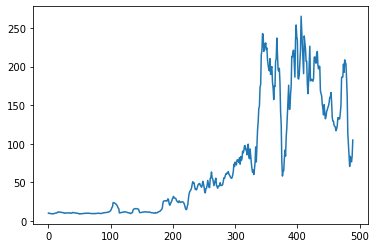

In [9]:
plt.plot(runningAvg(success_plot,10))
print(success_plot)

# Comparaison avec Q Learning et SARSA

Si nous comparons les résultats de nôtre réseau de neuronnes avec les résultats que nous avons obtenus avec Q Learning et SARSA (cf TP sur les différences temporelles) sur ce même environnement, 
nous voyons que Deep Q Learning atteint de meilleures résultats, en effet le réseau est capable d'atteindre un score de 250 (pour seulement 500 epochs) tandis que SARSA et Q Learning ne dépassent pas 140 (pour 30000 epochs). Cependant, en terme de performance temporelle, Deep Q Learning met beaucoup de temps à tourner, pour les 500 epochs nous avons dû laisser tourner le modèle plus de 3h, alors Q Learning et Sarsa exécutent les 30000 epochs en moins de 5 min. 